In [0]:
from google.colab import drive
import numpy as np 
import pandas as pd 
from pathlib import Path
from fastai import *
from fastai.vision import *
import torch

In [0]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
path = 'gdrive/My Drive/Cactus'
data_folder = Path(path)

In [0]:
train_df = pd.read_csv(path + "/train.csv")
test_df = pd.read_csv(path + "/sample_submission.csv")

In [0]:
test_img = ImageList.from_df(test_df, path=data_folder/'test', folder='test')

In [0]:
trfm = get_transforms(do_flip=True, flip_vert=True, max_rotate=10.0, max_zoom=1.1, max_lighting=0.2, max_warp=0.2, p_affine=0.75, p_lighting=0.75)

In [0]:
train_img = (ImageList.from_df(train_df, path=data_folder/'train', folder='train')
        .split_by_rand_pct(0.01)
        .label_from_df()
        .add_test(test_img)
        .transform(trfm, size=128)
        .databunch(path='.', bs=64, device= torch.device('cuda:0'))
        .normalize(imagenet_stats)
       )

In [0]:
learn = cnn_learner(train_img, models.densenet161, metrics=[error_rate, accuracy])

Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/checkpoints/densenet161-8d451a50.pth
100%|██████████| 115730790/115730790 [00:01<00:00, 74254111.34it/s]


In [0]:
lr = 3e-02
learn.fit_one_cycle(4, slice(lr))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.062227,0.028638,0.011429,0.988571,03:17
1,0.031481,0.015048,0.005714,0.994286,02:46
2,0.010671,0.005066,0.005714,0.994286,02:59
3,0.003719,0.001390,0.000000,1.000000,03:05


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


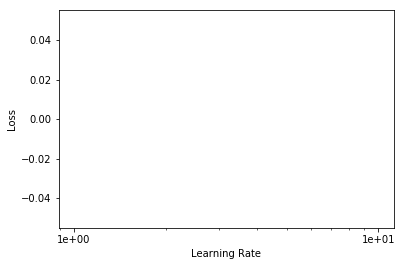

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
preds,_ = learn.get_preds(ds_type=DatasetType.Test)

In [0]:
test_df.has_cactus = preds.numpy()[:, 0]

In [0]:
test_df.to_csv('submission.csv', index=False)

In [0]:
!ls

gdrive			 models			submission.csv
kaggle.json		 sample_data		test.zip
label_descriptions.json  sample_submission.csv	train.csv.zip


In [0]:
from google.colab import files

In [0]:
files.download('submission.csv')